# 本文件说明

- 无监督机器学习算法：聚类

# 基本设置

In [17]:
import os

%matplotlib inline
import numpy as np
import pandas as pd

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

from toolkits.setup.specific_func import set_ch_pd
set_ch_pd()

# data & features

## load data

In [5]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x']
newsgroup_train = fetch_20newsgroups(subset = 'train',categories = categories)
newsgroup_test = fetch_20newsgroups(subset = 'test',categories = categories)

In [6]:
# 可以检验是否load好了：
#print category names
from pprint import pprint
pprint(list(newsgroup_train.target_names))
pprint(list(newsgroup_test.target_names))

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x']
['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x']


## extract features

In [8]:
# Method 1. HashingVectorizer，规定feature个数
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(stop_words = 'english',non_negative = True,
                               n_features = 10000)
fea_train = vectorizer.fit_transform(newsgroup_train.data)
fea_test = vectorizer.fit_transform(newsgroup_test.data)
 
#return feature vector 'fea_train' [n_samples,n_features]
print('Size of fea_train:' + repr(fea_train.shape))
print('Size of fea_train:' + repr(fea_test.shape))
#11314 documents, 130107 vectors for all categories
print('The average feature sparsity is {0:.3f}%'.format(fea_train.nnz/float(fea_train.shape[0]*fea_train.shape[1])*100))

D:\software\conda\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\software\conda\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\software\conda\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
D:\software\conda\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


Size of fea_train:(2936, 10000)
Size of fea_train:(1955, 10000)
The average feature sparsity is 1.002%


# 聚类算法

## sklearn

### load model

In [12]:
from sklearn.cluster import KMeans

n_clusters = len(categories)

cluster_model = KMeans(n_clusters=n_clusters, random_state=0)


### train--test

In [20]:
cluster_model.fit(fea_test)

Wall time: 32.5 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [19]:
y_pred_class = cluster_model.labels_  # cluster_model.labels_.tolist()
y_test = newsgroup_test.target
print('accuracy_score: ', metrics.accuracy_score(y_test, y_pred_class)) # 指所有分类正确的百分比
print(metrics.classification_report(y_test, y_pred_class))
print('confusion_matrix: ')
print( metrics.confusion_matrix(y_test, y_pred_class))

accuracy_score:  0.30179028132992325
             precision    recall  f1-score   support

          0       0.28      0.49      0.36       389
          1       0.78      0.42      0.55       394
          2       0.17      0.26      0.21       392
          3       0.30      0.08      0.13       385
          4       0.26      0.26      0.26       395

avg / total       0.36      0.30      0.30      1955

confusion_matrix: 
[[190   5 122   0  72]
 [ 57 166  87   7  77]
 [118  11 100  64  99]
 [119   5 186  31  44]
 [184  27  81   0 103]]


### plot result

In [21]:
print("Top terms per cluster:")
print()
# 按离质心的距离排列聚类中心，由近到远
order_centroids = cluster_model.cluster_centers_.argsort()[:, ::-1] 
 
for i in range(n_clusters):
    print("Cluster %d words:" % i, end='')
 
    for ind in order_centroids[i, :6]: # 每个聚类选 6 个词
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() # 空行
    print() # 空行
 
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() # 空行
    print() # 空行

Top terms per cluster:

Cluster 0 words:

NameError: name 'vocab_frame' is not defined

# 降维 & 可视化

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2", n_clusters)

In [42]:
def plot2(features):
    % matplotlib inline

    f = plt.figure(figsize=(15, 9))
    ax = f.add_subplot(111)

    for i in range(1,n_clusters + 1):
        ax.scatter(features[features['label']==i]['f1'],
                   features[features['label']==i]['f2'],
                   color=colors[i-1], label=i, alpha=.8) 
    
    ax.set_title("Truncated SVD, 2 Components")    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
#     print(class_name_dict)
    
    plt.show()

In [43]:
def plot3(features):    
    % matplotlib notebook

    f = plt.figure(figsize=(15, 9))
    ax = f.add_subplot(111, projection='3d')  # 创建一个三维的绘图工程

    for i in range(1,n_clusters + 1):
        ax.scatter(features[features['label']==i]['f1'],
                   features[features['label']==i]['f2'],
                   features[features['label']==i]['f3'],
                   color=colors[i-1], label=i, alpha=.8)

    ax.set_zlabel('f3')  # 坐标轴
    ax.set_ylabel('f2')
    ax.set_xlabel('f1')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
#     print(class_name_dict)

    plt.show()

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class DenseTransformer(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

In [ ]:
fea_test_dense = DenseTransformer().fit_transform(fea_test)

## TruncatedSVD, SparsePCA, PCA

In [28]:
from sklearn.decomposition import TruncatedSVD, SparsePCA, PCA

tsvd = TruncatedSVD(n_components = 3) # 处理稀疏数据
feature_tsvd = tsvd.fit_transform(fea_test)
print('-- TruncatedSVD: ')
print("各维度的方差值: ", tsvd.explained_variance_)
print("各维度的方差值占总方差值的比例: ", tsvd.explained_variance_ratio_) 
print("各维度的方差值之和占总方差值的比例: ", np.sum(tsvd.explained_variance_ratio_))
print(feature_tsvd.shape)

print()
pca = PCA(n_components = 3, whiten = True)
feature_pca = pca.fit_transform(fea_test_dense)
print('-- PCA: ')
print("各维度的方差值: ", pca.explained_variance_)
print("各维度的方差值占总方差值的比例: ", pca.explained_variance_ratio_) 
print("各维度的方差值之和占总方差值的比例: ", np.sum(pca.explained_variance_ratio_))
feature_pca

-- TruncatedSVD: 
各维度的方差值:  [0.00548302 0.0165702  0.00997951]
各维度的方差值占总方差值的比例:  [0.00593481 0.01793554 0.01080179]
各维度的方差值之和占总方差值的比例:  0.03467214093912531
(1955, 3)

-- PCA: 
各维度的方差值:  [0.01912887 0.01070231 0.00934659]
各维度的方差值占总方差值的比例:  [0.02069445 0.01157822 0.01011155]
各维度的方差值之和占总方差值的比例:  0.042384217847483384


array([[-1.22250971, -0.13265763,  2.38794454],
       [ 0.03863615, -0.61675793,  0.55695334],
       [ 0.40806565,  0.0947904 , -0.40901286],
       ...,
       [-0.94842688,  0.33707329,  0.53989553],
       [ 1.04289936, -0.28340958,  0.22619484],
       [-1.4374315 ,  4.50492824, -1.35120438]])

      f1     f2     f3  label
0 -1.223 -0.133  2.388      2
1  0.039 -0.617  0.557      2
2  0.408  0.095 -0.409      0
3 -1.203  2.282 -0.965      1
4 -0.746 -0.788 -0.711      4


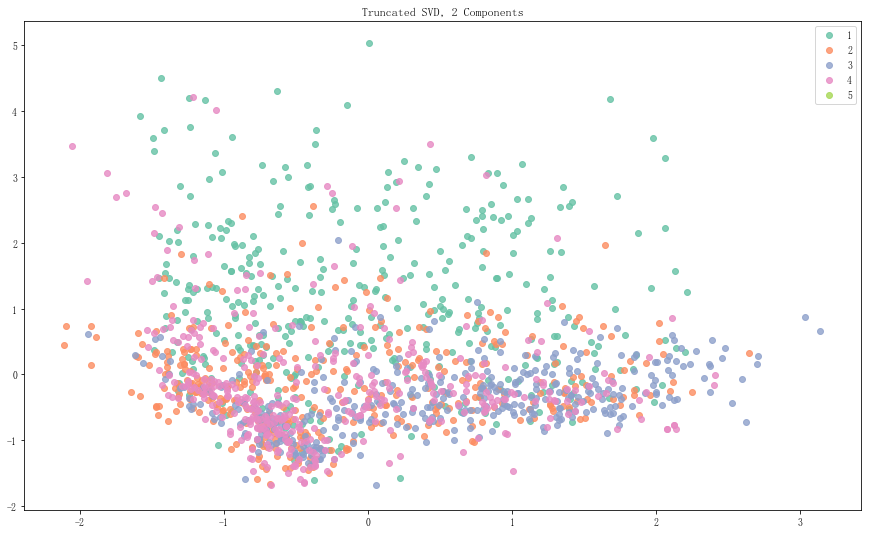

In [44]:
features = pd.DataFrame(feature_pca, columns = ['f1', 'f2', 'f3'])
features['label'] = newsgroup_test.target
print(features.head())
features.describe()

plot2(features)

<IPython.core.display.Javascript object>


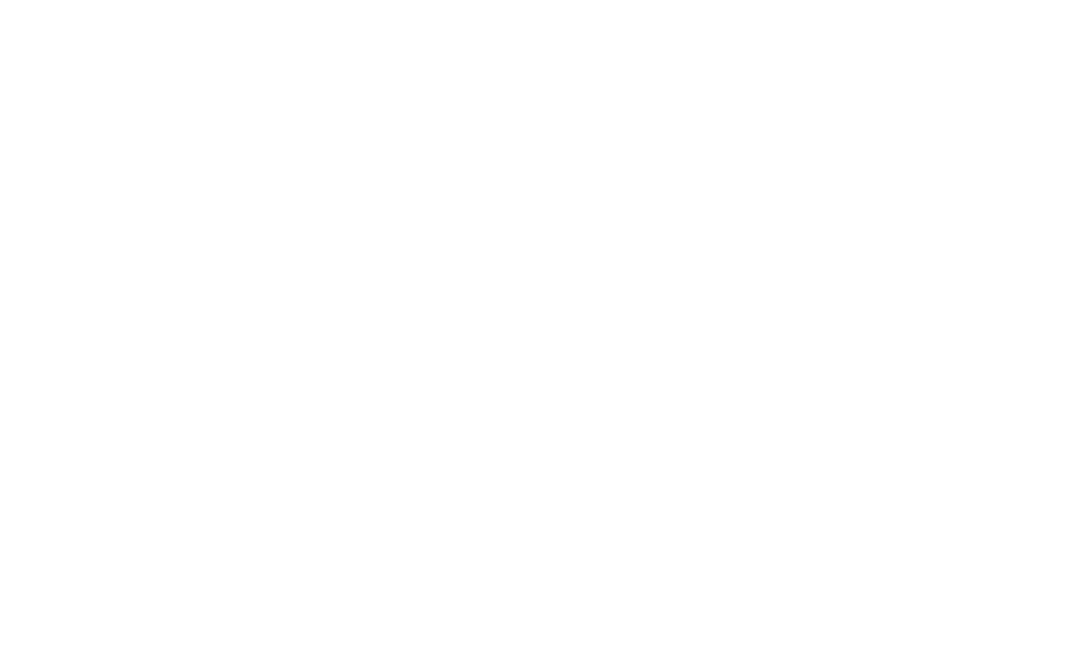

<IPython.core.display.Javascript object>


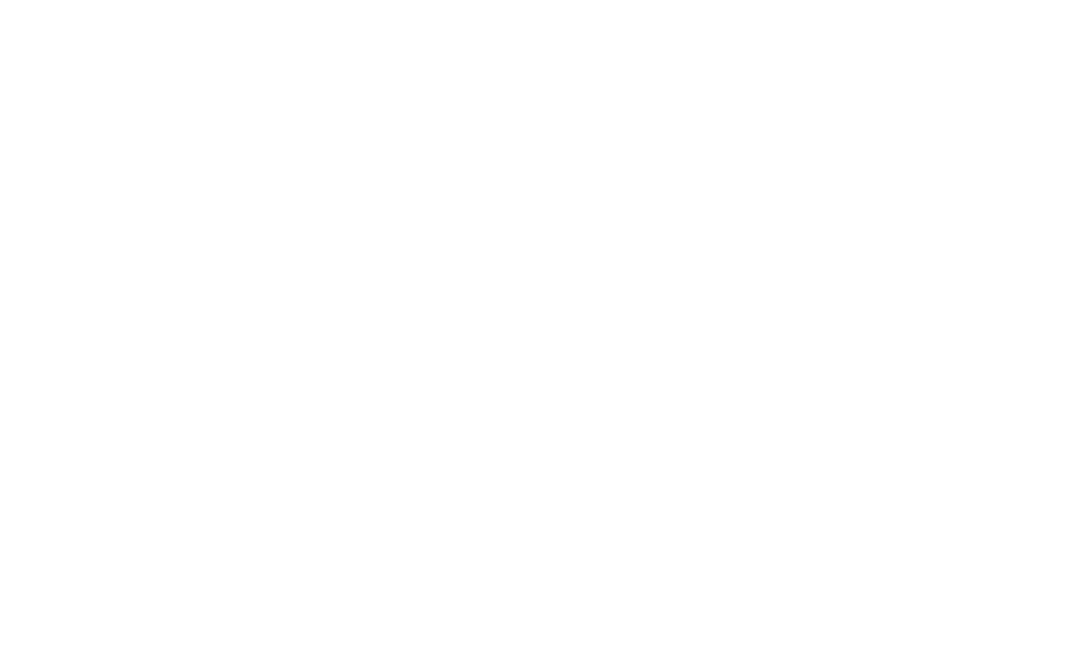

In [54]:
plot3(features)

## lda

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(fea_test_dense, newsgroup_test.target)
feature_lda = lda.transform(fea_test_dense)

print('-- lda: ')
print(feature_lda.shape)
# print("截距: ", lda.intercept_)
# print("系数: ", lda.coef_)
print("各维度的方差值占总方差值的比例: ", lda.explained_variance_ratio_) 
print("各维度的方差值之和占总方差值的比例: ", np.sum(lda.explained_variance_ratio_))
feature_lda

-- lda: 
(1955, 3)
各维度的方差值占总方差值的比例:  [0.82368963 0.07802718 0.05537834]
各维度的方差值之和占总方差值的比例:  0.9570951443847875


array([[-0.44308604, -0.0397052 ,  1.14387554],
       [-0.50638191,  0.21385695,  3.55831822],
       [-1.24774653,  2.46104178,  0.02475084],
       ...,
       [-0.59043764,  0.33912369,  2.96984336],
       [-6.21222015, -1.2575998 , -0.43933397],
       [-1.27194313,  1.17848641, -2.22802977]])

      f1     f2     f3  label
0 -1.223 -0.133  2.388      2
1  0.039 -0.617  0.557      2
2  0.408  0.095 -0.409      0
3 -1.203  2.282 -0.965      1
4 -0.746 -0.788 -0.711      4


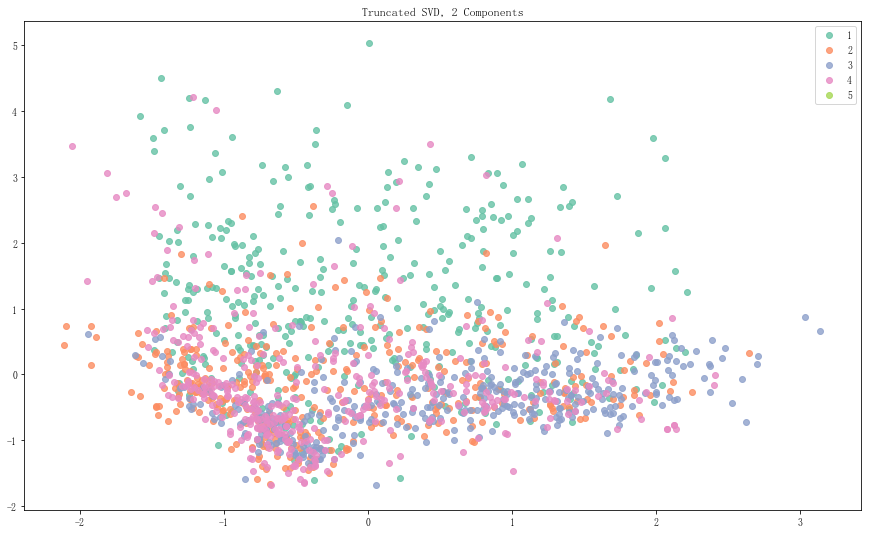

In [52]:
features = pd.DataFrame(feature_pca, columns = ['f1', 'f2', 'f3'])
features['label'] = newsgroup_test.target
print(features.head())
features.describe()

plot2(features)

<IPython.core.display.Javascript object>


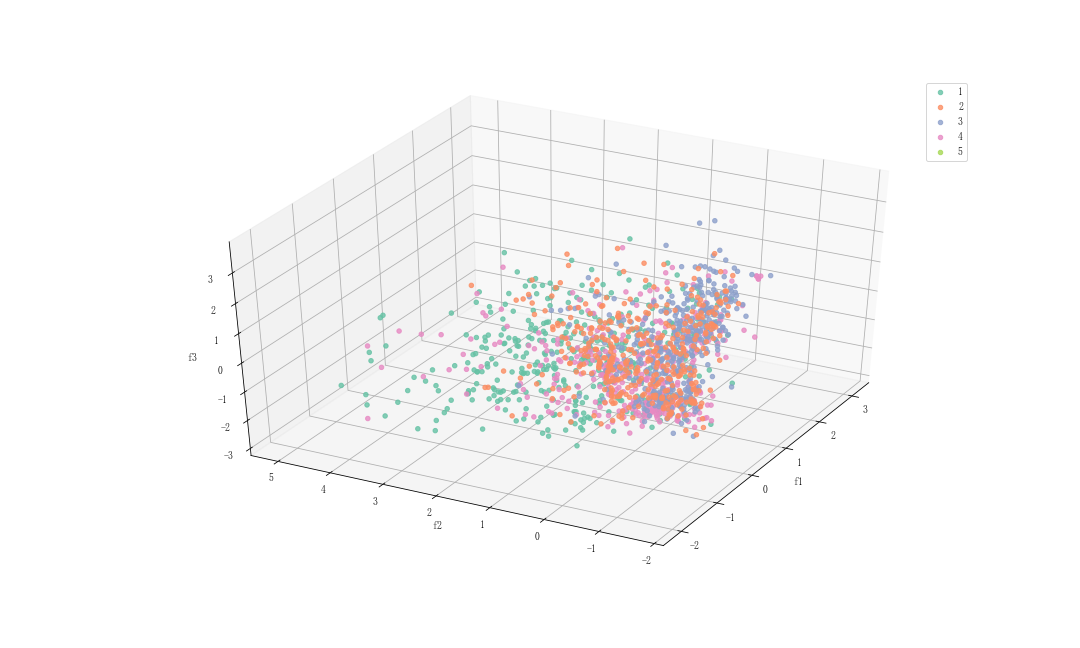

In [56]:
plot3(features)

## TSNE
- tsne 保留下的属性信息，更具代表性，也即最能体现样本间的差异；
- TSNE 运行极慢，PCA 则相对较快；
- 因此更为一般的处理，尤其在展示（可视化）高维数据时，常常先用 PCA 进行降维，再使用 tsne
> - data_pca = PCA(n_components=50).fit_transform(data)
> - data_pca_tsne = TSNE(n_components=2).fit_transform(data_pca)

In [57]:
from sklearn.manifold import TSNE

feature_tsne = TSNE(n_components=2,learning_rate=100).fit_transform(fea_test_dense)

       f1      f2  label
0 -25.879  26.743      2
1 -22.616  49.479      2
2  34.772  26.648      0
3 -34.690  -4.698      1
4  -3.655 -32.627      4


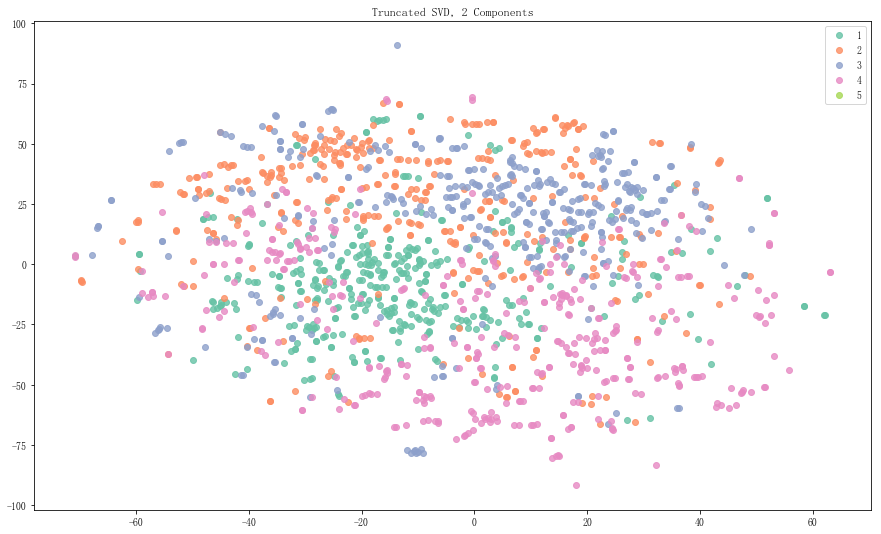

In [61]:
features = pd.DataFrame(feature_tsne, columns = ['f1', 'f2'])
features['label'] = newsgroup_test.target
print(features.head())
features.describe()

plot2(features)

# 保存本文件

In [ ]:
if 1:
    import os
    import datetime as dt
    
    def output_HTML(read_file, output_file):
        from nbconvert import HTMLExporter
        import codecs
        import nbformat
        exporter = HTMLExporter()
        # read_file is '.ipynb', output_file is '.html'
        output_notebook = nbformat.read(read_file, as_version=4)
        output, resources = exporter.from_notebook_node(output_notebook)
        codecs.open(output_file, 'w', encoding='utf-8').write(output)

    html_file_folder = 'html_files'
    if not os.path.exists(html_file_folder):
        os.makedirs(html_file_folder)

    today = dt.datetime.now().strftime('%Y%m%d')
    current_file = '1_get_data.ipynb'
    output_file = 'html_files\%s_%s.html'%(os.path.splitext(current_file)[0], today)
    output_HTML(current_file, output_file)